# Ship Route Optimization

When traveling on the surface of the Earth one cannot take a constant heading to travel the shortest route from point **A** to **B**. 

Instead, the heading must be constantly readjusted so that the arc of the trajectory corresponds to the intersection between the globe and a plane that passes through the center of the Earth. 

For ships the ocean currents are an important factor which can be harnessed to produce the optimal path.

## Operation

- This app generates a **Graph** with the (latitude, longitude) grid of ocean points around the globe as vertices.
- Edges are the **8-point** ocean neighbours with weights being the time taken by the ship to travel the length of the edge considering the **Ocean Currents**. 
- This app generates an optimal route for a ship by running **Dijkstra's Shortest Path Algorithm** on this graph with the **Start** and **End** points taken as inputs.


In [1]:
from main import *

2026-01-19 14:51:45.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
# Coordinates Wakayama Bay Port of Kobe, Japan
end_coord = (34.0349, 134.5411)  

# Head waters of Bass Straight Port of Hastings, VIC
start_coord = (-38.3, 145.0)  
boat_avg_speed = 1.0

In [84]:
lon_pre, lat_pre, U_pre, V_pre = get_ocean_current_dataset()
lon_post, lat_post, U_post, V_post = process_ds(lon_pre, lat_pre, U_pre, V_pre)

# Generate Graph
G = graph_factory(lon_post, lat_post, U_post, V_post, boat_avg_speed)

# Get optimal path
path = get_optimal_routes(G, start_coord, end_coord, lon_post, lat_post)

# Convert path into list of lat, lon coordinates
xx, yy = get_coordinates_from_path_indices(path, lon_post, lat_post)

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def plot_matplot(lon, lat, U, V, xx, yy):
    """
    Generates result plot

    Parameters
    ----------
    lon: array
        1D array containing longitude points
    lat: array
        1D array containing latitude points
    U: array
        2D array containing x component of ocean current speeds [shape -> (len(lat), len(lon))]
    V: array
        2D array containing y component of ocean current speeds [shape -> (len(lat), len(lon))]
    """

    fig, ax = plt.subplots(figsize=(15, 15))
    m = Basemap(width=12000000,height=9000000,resolution='l')
    m.drawcoastlines(linewidth=0.5)
    m.drawmapboundary(fill_color='aqua', linewidth=0.5)
    m.fillcontinents(color='coral',lake_color='aqua')

    dec = 5
    lon = lon[::dec]
    lat = lat[::dec]
    U = U[::dec, ::dec]
    V = V[::dec, ::dec]
    lon, lat, U, V = sanitize(lon, lat, U, V)

    m.streamplot(lon, lat, U, V, latlon=True, color=U, linewidth=0.5, cmap='ocean', arrowsize=0.5)

    m.plot(xx, yy, 'k:', linewidth=2, label='Optimal Path', latlon=True)
    m.scatter([xx[0]], [yy[0]], c='g', label='Start', latlon=True)
    m.scatter([xx[-1]], [yy[-1]], c='b', label='End', latlon=True)

    plt.legend()
    return fig

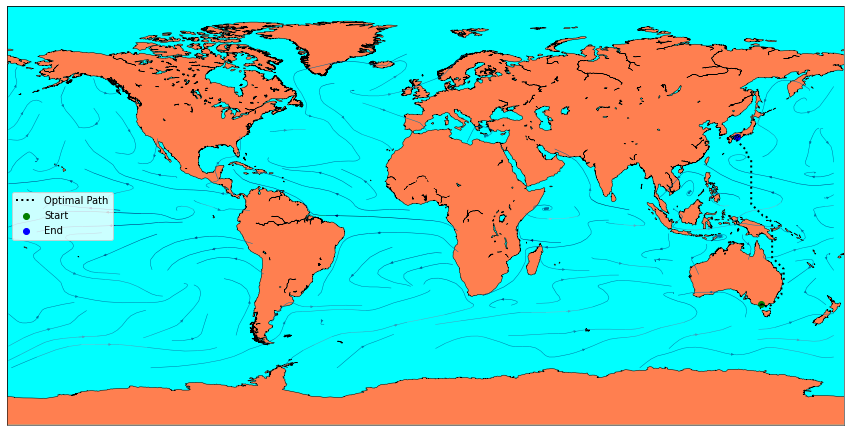

In [86]:
fig = plot_matplot(lon_post, lat_post, U_post, V_post, xx, yy)
plt.show()